In [1]:
from typing import List, Dict, Any, TypedDict

class AgentState(TypedDict):
    amount_usd: float
    total_usd: float
    total_pkr:float


In [2]:
def cal_total(state : AgentState) -> AgentState:
    state['amount_usd']=state['amount_usd']*1.08
    return state

def convert_to_pkr(state : AgentState) -> AgentState:
    state['amount_usd']=state['amount_usd']*220
    return state



In [3]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(AgentState)

builder.add_node("cal_total", cal_total)
builder.add_node("convert_to_pkr", convert_to_pkr)

builder.add_edge(START, "cal_total")
builder.add_edge("cal_total", "convert_to_pkr")
builder.add_edge("convert_to_pkr", END)

graph = builder.compile()

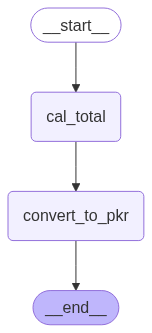

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({"amount_usd": 100})

{'amount_usd': 23760.0}